<a href="https://colab.research.google.com/github/byu-cce270/content/blob/main/docs/unit3/04_pandas_part2/In_Class_Pandas_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import statements go here



In [ ]:
#make sure you upload the provided excel file into the dataframe
#read in each sheet in the excel file into a different dataframe
#this is the syntax to do that, you will just have to copy your file path
#this syntax will not be given on the homework, so make sure you understand what it is doing

dfs_df = pd.read_excel('/content/3.3 in-class_pandas2.xlsx', sheet_name=None)
for sheet_name, df in dfs_df.items():
  print(f"Sheet name: {sheet_name}")
  print(df.head())

In [ ]:
# example appending rows to dataframe (Concat)
# https://pandas.pydata.org/docs/user_guide/merging.html#

df1 = pd.DataFrame(
        {
            "A": ["A0", "A1", "A2", "A3"],
            "B": ["B0", "B1", "B2", "B3"],
            "C": ["C0", "C1", "C2", "C3"],
            "D": ["D0", "D1", "D2", "D3"],
        },
        index=[0, 1, 2, 3],
    )

df2 = pd.DataFrame(
      {
           "A": ["A4", "A5", "A6", "A7"],
           "B": ["B4", "B5", "B6", "B7"],
           "C": ["C4", "C5", "C6", "C7"],
           "D": ["D4", "D5", "D6", "D7"],
      },
      index=[4, 5, 6, 7],
   )

df3 = pd.DataFrame(
      {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
      },
      index=[8, 9, 10, 11],
  )

#use the .concat() method to combine the above 3 dataframes into one DataFrame
#use the .head() command to print the first 20 rows in the DataFrame


In [ ]:
#write the correct code here to access the data from the 'Car 1' tab in the excel file in a dataframe
#write the correct code here to access the data from the 'Car 2' tab in the excel file in a dataframe



#display the dataframe here


In [ ]:
#Append rows from the 2 car data frames

# First add a new column called 'ID'



# then combine into a list


## then use the pandas concat function


# display the new dataframe


In [ ]:
#write the correct code here to access the data from the 'Acceleration' tab in the excel file in a dataframe


#display the dataframe you created



In [ ]:
# merge the acceleration df to the speed by ID and by Time
# call the new merged DataFrame power_df

# See documentation here for merging on multiple columns for extra information
# <https://pandas.pydata.org/docs/user_guide/merging.html>



In [ ]:
# calculate power due to acceleration in units of kilowatts (kW)

# Remember:
# Force = Mass * Acceleration
# Work = Force * Distance
# Power = Work/time
# Power = Mass * Acceleration * Distance/time = Mass * Acceleration * Speed
# Watts = (kg*m^2)/(s^3)

# mass = 2270 kg (2016 Ford Explorer)



#display the first 20 rows of the dataframe here


In [ ]:
# calculate the average speed of all my observations using .mean()



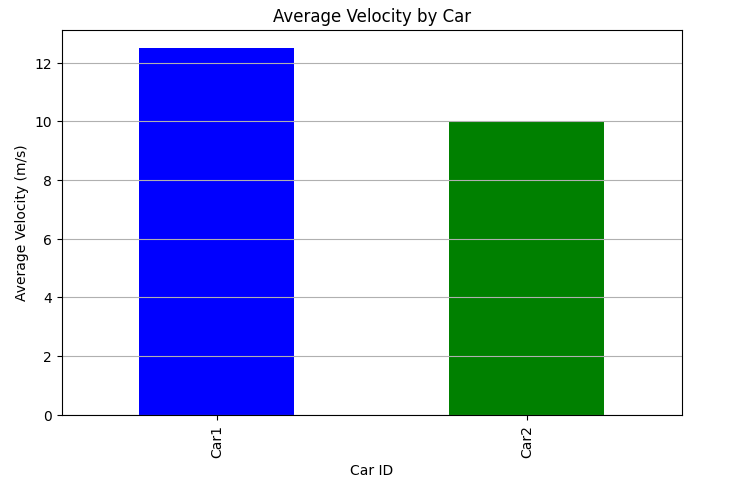

In [ ]:
# calculate the average speed by Car using .groupby() and .mean()


#create a bar chart like the one shown above


In [ ]:
# calculate the average speed, acceleration, and P_accel by Car




In [ ]:
# calculate the average, count, min, and max P_accel by Car
# See links on Pandas Cheat Sheet under groupby


